## Reading dataset


Lets read Iris datset. Iris has 3 target classes.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
# Step 1: Load and preprocess the Iris dataset
df = pd.read_csv('iris.csv')

print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
X = df.iloc[:, :-1]  # All rows, all columns except last
y = df.iloc[:, -1]   # All rows, only the last column

In [14]:
print(X)
print(X.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
(150, 4)


In [15]:
# Lets see how many classes does y has
y.unique()

array([0, 1, 2])

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"First 5 training data:\n {X_train[:5]}")

First 5 training data:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


In [17]:
print(X_train.shape) # rows,columns
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [18]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"(After standardizing)First 5 training data:\n {X_train[:5]}")

# Convert target labels to one-hot encoding (optional for sparse_categorical_crossentropy)
y_train_onehot = to_categorical(y_train, num_classes=3) # iris target has 3 classes.
y_test_onehot = to_categorical(y_test, num_classes=3)
print(f"First 6 training labels y_train[:6]:\n {y_train[:6]}")
print(f"First 6 onehot training labels y_train_onehot[:6]:\n {y_train_onehot[:6]}")


(After standardizing)First 5 training data:
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]
First 6 training labels y_train[:6]:
 22     0
15     0
65     1
11     0
42     0
146    2
Name: target, dtype: int64
First 6 onehot training labels y_train_onehot[:6]:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [19]:
# 112/8 = 14 is the batch size
#  Create a simple sequential model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),  # Input layer (4 features). The hidden layer has 64 neuron
    layers.Dense(3, activation='softmax')  # Output layer (3 classes)
])

model.summary()

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

## 1 First Dense Layer (Hidden Layer)
- Input Shape: (4,) (4 input features)
- Units (Neurons): 64
- Weights Calculation:
  
  (Input Features×Neurons)+Bias

  (4×64)+64=256+64=320

## 2️. Second Dense Layer (Output Layer)
- Input Shape: (64,) (from the previous layer)
- Units (Neurons): 3 (for 3-class classification)
- Weights Calculation:

  (Input Features×Neurons)+Bias

  (64×3)+3=192+3=195

In [20]:
#  Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Train the model
model.fit(X_train, y_train_onehot, epochs=10, batch_size=8, validation_split=0.1)  # Train for 10 epochs

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5570 - loss: 0.9896 - val_accuracy: 0.6667 - val_loss: 0.9110
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7794 - loss: 0.7792 - val_accuracy: 0.7500 - val_loss: 0.8248
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8443 - loss: 0.6299 - val_accuracy: 0.7500 - val_loss: 0.7572
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6983 - loss: 0.6474 - val_accuracy: 0.7500 - val_loss: 0.7075
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8082 - loss: 0.5258 - val_accuracy: 0.6667 - val_loss: 0.6686
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7920 - loss: 0.4873 - val_accuracy: 0.7500 - val_loss: 0.6384
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8164 - loss: 0.4482 - val_accuracy: 0.7500 - val_loss: 0.6125
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7964 - loss: 0.4312 - val_accuracy: 0.8333 - val

In [21]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8667 - loss: 0.3415
Test accuracy: 0.87


90%...pretty good 

In [17]:
#  Make predictions
samples = -1 # -1 to read all samples
predictions = model.predict(X_test[:samples])  # Predict on the first few samples of the test set
predicted_labels = predictions.argmax(axis=1)  # Get the predicted class
true_labels = y_test[:samples]  # Get actual labels

# Create a DataFrame for side-by-side comparison
df_results = pd.DataFrame({"Predicted": predicted_labels,
                           "Actual": true_labels})

print(df_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
     Predicted  Actual
73           1       1
18           0       0
118          2       2
78           2       1
76           2       1
31           0       0
64           1       1
141          2       2
68           1       1
82           1       1
110          2       2
12           0       0
36           0       0
9            0       0
19           0       0
56           2       1
104          2       2
69           1       1
55           1       1
132          2       2
29           0       0
127          2       2
26           0       0
128          2       2
131          2       2
145          2       2
108          2       2
143          2       2
45           0       0


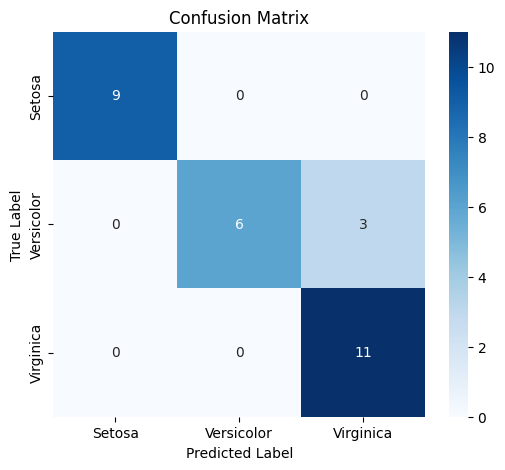

****************


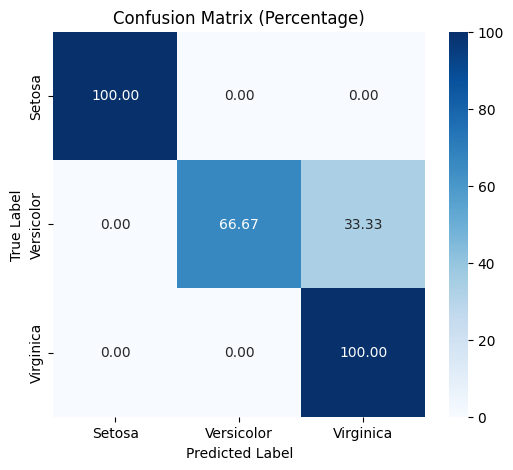

In [19]:
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("****************")

# Convert to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100  # Normalize each row

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [20]:
model.save("model.keras")

In [21]:
# Load the model back if you need in future
loaded_model = tf.keras.models.load_model("model.keras")